# Introduction

Everyday we come across various products in our lives, on the digital medium we swipe across hundreds of product choices under one category. It will be tedious for the customer to make selection.
Here comes 'reviews' where customers who have already got that product leave a rating after using them and brief their experience by giving reviews. As we know ratings can be easily sorted and judged whether a product is good or bad.
But when it comes to sentence reviews we need to read through every line to make sure the review conveys a positive or negative sense.
In the era of artificial intelligence, things like that have got easy with the Natural Langauge Processing(NLP) technology.





# Problem statement

This is the Problem Statement given by ISRO to classify the customer comments.
This would be helpful for the organization to understand Customer feedbacks.
Webportals like Bhuvan get vast amount of feedback from the users. 
To go through all the feedback's can be a tedious job. You have to categorize opinions expressed in feedback forums.
This can be utilized for feedback management system. We Classification of individual comments/reviews.and we also determining overall rating based on individual comments/reviews.
So that company can get a complete idea on feedback's provided by customers and can take care on those particular fields. This makes more loyal Customers to the company, increase in business , fame ,brand value ,profits

# Objectives of Project

Reviews Preprocessing and Cleaning

Story Generation and Visualization from reviews

Extracting Features from Cleaned reviews

Model Building: Sentiment Analysis

In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import nltk
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud ,STOPWORDS

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')




In [2]:
#Loading the dataset

df = pd.read_csv('Musical_instruments_reviews.csv')
df.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                                 summary  unixReviewTime   reviewTime  
0                                   good      1393545600  02 28, 2014  
1                                   Jake      1363392000  03 16, 2013  
2                   It Does The Job Well      1377648000  08 28, 2013  
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014  
4  No more pops when I record my vocals.      1392940800  02 21, 2014

# Dataset Details

This file has reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text),Overall Rating on a scale 5, Review time

Description of columns in the file:

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

helpful - helpfulness rating of the review, e.g. 2/3

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [4]:
df.shape

(10261, 9)

### Preprocessing and cleaning

We got to do lot of preprocessing before sending the reviews to the model. Let's go step by step.

In [5]:
#checking the null values

df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [6]:
#Creating a copy
df_copy=df.copy()

#droping the null values

df.drop('reviewerName' , axis = 1)
df.fillna(' ' , inplace = True)

In [7]:
df.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [8]:
#Concatenating review text and summary

df['reviews'] = df['reviewText']+df['summary']
df=df.drop(['reviewText', 'summary'], axis=1)
df.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews  
0  Not much to write about here, but it does exac...  
1  The product does exactly as it should and is q...  
2  The primary job of this device is to block the...  
3  Nice windscreen protects my MXL mic and preven...  
4  This pop filter is great. It looks and perform...

Creating sentiment column

This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment

In [9]:
#value counts of overall

df['overall'].value_counts()

overall
5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

In [10]:
def f(row):
    
    if row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = 'Neutral'
    return val
    

In [11]:
#applying the fucntion in our new column 

df['sentiment'] = df.apply(f,axis=1)
df.head(25)

reviewerID        asin  \
0   A2IBPI20UZIR0U  1384719342   
1   A14VAT5EAX3D9S  1384719342   
2   A195EZSQDW3E21  1384719342   
3   A2C00NNG1ZQQG2  1384719342   
4    A94QU4C90B1AX  1384719342   
5   A2A039TZMZHH9Y  B00004Y2UT   
6   A1UPZM995ZAH90  B00004Y2UT   
7    AJNFQI3YR6XJ5  B00004Y2UT   
8   A3M1PLEYNDEYO8  B00004Y2UT   
9    AMNTZU1YQN1TH  B00004Y2UT   
10  A2NYK9KWFMJV4Y  B00004Y2UT   
11  A35QFQI0M46LWO  B00005ML71   
12  A2NIT6BKW11XJQ  B00005ML71   
13  A1C0O09LOLVI39  B00005ML71   
14  A17SLR18TUMULM  B00005ML71   
15  A2PD27UKAD3Q00  B00005ML71   
16   AKSFZ4G1AXYFC  B000068NSX   
17   A67OJZLHBBUQ9  B000068NSX   
18  A2EZWZ8MBEDOLN  B000068NSX   
19  A1CL807EOUPVP1  B000068NSX   
20  A1GMWTGXW682GB  B000068NSX   
21  A2G12DY50U700V  B000068NSX   
22   A3E0CF25A7LD2  B000068NSX   
23  A2W3CLAYZLDPTV  B000068NTU   
24  A398X9POBHK69N  B000068NTU   

                                        reviewerName   helpful  overall  \
0   cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                               Jake  [13, 14]      5.0   
2                      Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                          RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                      SEAN MASLANKA    [0, 0]      5.0   
5                                Bill Lewey "blewey"    [0, 0]      5.0   
6                                              Brian    [0, 0]      5.0   
7                                  Fender Guy "Rick"    [0, 0]      3.0   
8                                    G. Thomas "Tom"    [0, 0]      5.0   
9                                        Kurt Robair    [0, 0]      5.0   
10                       Mike Tarrani "Jazz Drummer"    [6, 6]      5.0   
11                                     Christopher C    [0, 0]      4.0   
12                                               Jai    [0, 0]      3.0   
13                                           Michael    [0, 0]      5.0   
14                                       Straydogger    [0, 0]      5.0   
15              Wilhelmina Zeitgeist "coolartsybabe"    [0, 0]      2.0   
16                                      C.E. "Frank"    [0, 0]      4.0   
17                  Charles F. Marks "charlie marks"    [0, 0]      5.0   
18                                            Charlo    [3, 3]      5.0   
19                                           GunHawk    [0, 0]      5.0   
20                                          MetalFan    [0, 0]      4.0   
21                                       Ricky Shows    [0, 0]      5.0   
22                                            WBowie    [0, 0]      4.0   
23                         Amazon Customer "=Chris="    [0, 0]      5.0   
24                                   Ann Vande Zande    [0, 0]      5.0   

    unixReviewTime   reviewTime  \
0       1393545600  02 28, 2014   
1       1363392000  03 16, 2013   
2       1377648000  08 28, 2013   
3       1392336000  02 14, 2014   
4       1392940800  02 21, 2014   
5       1356048000  12 21, 2012   
6       1390089600  01 19, 2014   
7       1353024000  11 16, 2012   
8       1215302400   07 6, 2008   
9       1389139200   01 8, 2014   
10      1334793600  04 19, 2012   
11      1398124800  04 22, 2014   
12      1384646400  11 17, 2013   
13      1371340800  06 16, 2013   
14      1356912000  12 31, 2012   
15      1376697600  08 17, 2013   
16      1376352000  08 13, 2013   
17      1373328000   07 9, 2013   
18      1363564800  03 18, 2013   
19      1375833600   08 7, 2013   
20      1331856000  03 16, 2012   
21      1390953600  01 29, 2014   
22      1354924800   12 8, 2012   
23      1341446400   07 5, 2012   
24      1383177600  10 31, 2013   

                                              reviews sentiment  
0   Not much to write about here, but it does exac...  Positive  
1   The product does exactly as it should and is q...  Positive  
2   The primary job of this device is to block the...  Positive

In [12]:
df['sentiment'].value_counts()

sentiment
Positive    9022
Neutral      772
Negative     467
Name: count, dtype: int64

In [13]:
#removing the unnecessary columns
df = df.drop(['reviewerName' , 'helpful' , 'unixReviewTime' ] , axis = 1)


In [14]:
df.head()

reviewerID        asin  overall   reviewTime  \
0  A2IBPI20UZIR0U  1384719342      5.0  02 28, 2014   
1  A14VAT5EAX3D9S  1384719342      5.0  03 16, 2013   
2  A195EZSQDW3E21  1384719342      5.0  08 28, 2013   
3  A2C00NNG1ZQQG2  1384719342      5.0  02 14, 2014   
4   A94QU4C90B1AX  1384719342      5.0  02 21, 2014   

                                             reviews sentiment  
0  Not much to write about here, but it does exac...  Positive  
1  The product does exactly as it should and is q...  Positive  
2  The primary job of this device is to block the...  Positive  
3  Nice windscreen protects my MXL mic and preven...  Positive  
4  This pop filter is great. It looks and perform...  Positive

In [15]:
#Handling time column

# new data frame which has date and year
new = df["reviewTime"].str.split(",", n = 1, expand = True) 
  
# making separate date column from new data frame 
df["date"]= new[0] 
  
# making separate year column from new data frame 
df["year"]= new[1] 

df=df.drop(['reviewTime'], axis=1)
df.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   

                                             reviews sentiment   date   year  
0  Not much to write about here, but it does exac...  Positive  02 28   2014  
1  The product does exactly as it should and is q...  Positive  03 16   2013  
2  The primary job of this device is to block the...  Positive  08 28   2013  
3  Nice windscreen protects my MXL mic and preven...  Positive  02 14   2014  
4  This pop filter is great. It looks and perform...  Positive  02 21   2014

In [16]:
# Splitting the date 
new1 = df["date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
df["month"]= new1[0] 
  
# adding day to the main dataset 
df["day"]= new1[1] 

df=df.drop(['date'], axis=1)
df.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   

                                             reviews sentiment   year month  \
0  Not much to write about here, but it does exac...  Positive   2014    02   
1  The product does exactly as it should and is q...  Positive   2013    03   
2  The primary job of this device is to block the...  Positive   2013    08   
3  Nice windscreen protects my MXL mic and preven...  Positive   2014    02   
4  This pop filter is great. It looks and perform...  Positive   2014    02   

  day  
0  28  
1  16  
2  28  
3  14  
4  21

### Stemming the reviews

Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word.

for example,

Going->go

Finally->fina

In [17]:
#Stemming - removing unnecessary charatcters 

import nltk
from nltk.corpus import stopwords

port_stem = PorterStemmer() 


def stemming(reviews):
    stemmed_reviews = re.sub('[^a-zA-Z]',' ',reviews) #using this we are removing all the numbers and symbols, only alphabtes will be taken 
    stemmed_reviews = stemmed_reviews.lower() # converting into lower
    stemmed_reviews = stemmed_reviews.split() # splitting the words into list
    stemmed_reviews = [port_stem.stem(word) for word in stemmed_reviews if not word in stopwords.words('english')]
    #now taking the lsit of words which are not there in stop words we are removing the stopwords 
    stemmed_reviews = ' '.join(stemmed_reviews) #joining all the words
    return stemmed_reviews

In [18]:
df['reviews'] = df['reviews'].apply(stemming)

In [19]:
df['reviews']

0        much write exactli suppos filter pop sound rec...
1        product exactli quit afford realiz doubl scree...
2        primari job devic block breath would otherwis ...
3        nice windscreen protect mxl mic prevent pop th...
4        pop filter great look perform like studio filt...
                               ...                        
10256                         great expect thank five star
10257    think tri nanoweb string bit put high price co...
10258    tri coat string past includ elixir never fond ...
10259    well made elixir develop taylor guitar string ...
10260    string realli quit good call perfect unwound s...
Name: reviews, Length: 10261, dtype: object

## Exploratory Data Analysis

In this section we will complete do exploratory data analysis on texts as well as other factors to understand what are all features which contributes to the sentiment.

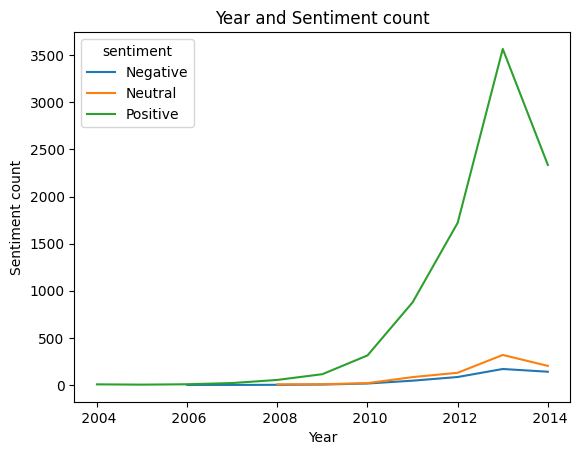

In [20]:
#Year vs Sentiment count
#In this block we will see how many reviews were posted based on sentiments in each year from 2004 to 2014

df.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

From the plot we can clearly see the rise in positive reviews from 2010.
Reaching its peak around 2013 and there is a dip in 2014, All the review rates were dropped at this time.
Negative and neutral reviews are very low as compared to the positive reviews.

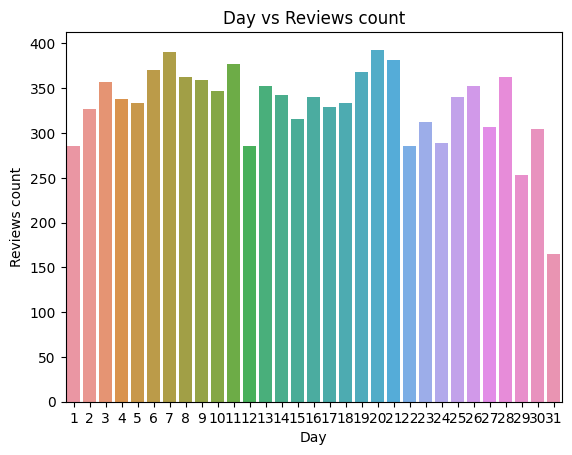

In [21]:
#Day of month vs Reviews count
#Let's check if there are any relationship between reviews and day of month


#Creating a dataframe
day=pd.DataFrame(df.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

The review counts are more or less uniformly distributed.
There isn't much variance between the days. But there is a huge drop at the end of month.

#### Creating few more features for text analysis

Now, let's create polarity, review length and word count

Polarity: We use Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity

Review length: length of the review which includes each letters and spaces

Word length: This measures how many words are there in review

In [22]:
from textblob import TextBlob


In [23]:
df['sentiment_Score'] = df['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['reviews'].astype(str).apply(len)
df['word_count'] = df['reviews'].apply(lambda x: len(str(x).split()))


In [24]:
df.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   

                                             reviews sentiment   year month  \
0  much write exactli suppos filter pop sound rec...  Positive   2014    02   
1  product exactli quit afford realiz doubl scree...  Positive   2013    03   
2  primari job devic block breath would otherwis ...  Positive   2013    08   
3  nice windscreen protect mxl mic prevent pop th...  Positive   2014    02   
4  pop filter great look perform like studio filt...  Positive   2014    02   

  day  sentiment_Score  review_len  word_count  
0  28         0.387500         142          24  
1  16         0.087500         296          53  
2  28         0.186667         260          45  
3  14         0.650000         144          23  
4  21         0.800000         105          18

#### Sentiment polarity distribution

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

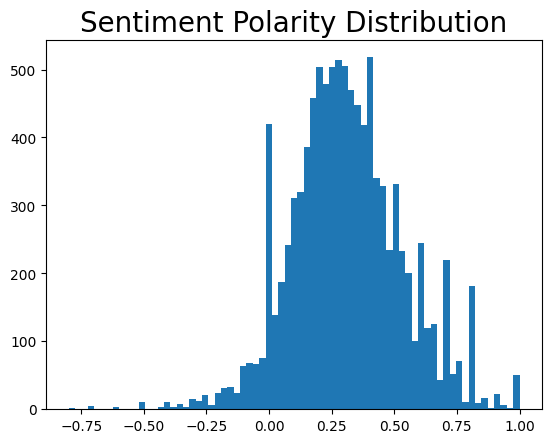

In [25]:
import matplotlib.pyplot as plt

plt.hist(x=df['sentiment_Score'] , bins = 'auto' )
plt.title('Sentiment Polarity Distribution' , fontsize = 20)


We have a lot of positive polarities compared to the negative polarities

This polarity distributions assures the number of positive reviews we had

#### Review Rating Distribution




Text(0.5, 1.0, 'Review Rating Distribution')

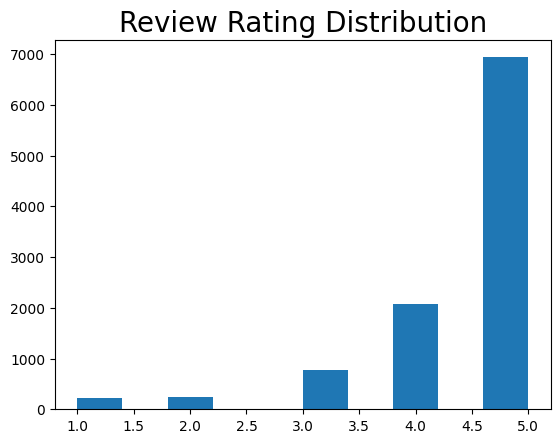

In [26]:
plt.hist(x=df['overall'] , label = True )
plt.title('Review Rating Distribution' , fontsize = 20)


We have a large number of 5 ratings(nearly 7k) followed by 4,3,2,1. It's linear in nature

#### Review Text Length Distribution

Text(0.5, 1.0, 'Review Text Length Distribution')

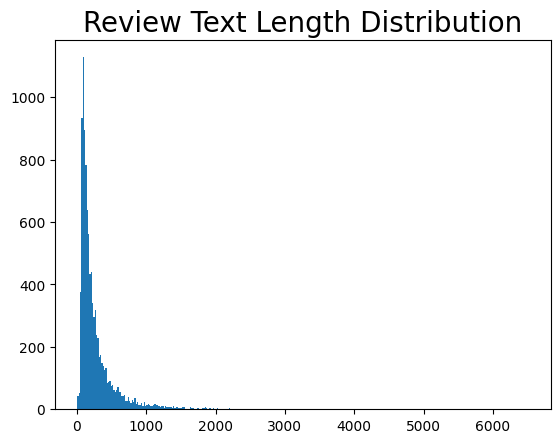

In [27]:
plt.hist(x=df['review_len'] , bins = 'auto' )
plt.title('Review Text Length Distribution' , fontsize = 20)

We have a right skewed distribution where most of the lengths falls between 0-1000

#### Review Text Word Count Distribution

Text(0.5, 1.0, 'Review Text Word Count Distribution')

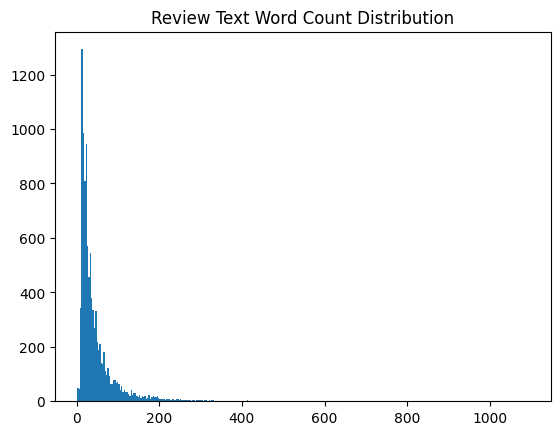

In [28]:
plt.hist(x=df['word_count'] , bins = 'auto' )
plt.title('Review Text Word Count Distribution')

We have a right skewed distribution with most of the words falling between 0-200 in a a review

In [29]:
#Filtering data
review_pos = df[df["sentiment"]=='Positive'].dropna()
review_neu = df[df["sentiment"]=='Neutral'].dropna()
review_neg = df[df["sentiment"]=='Negative'].dropna()

#### Wordcloud-Positive reviews

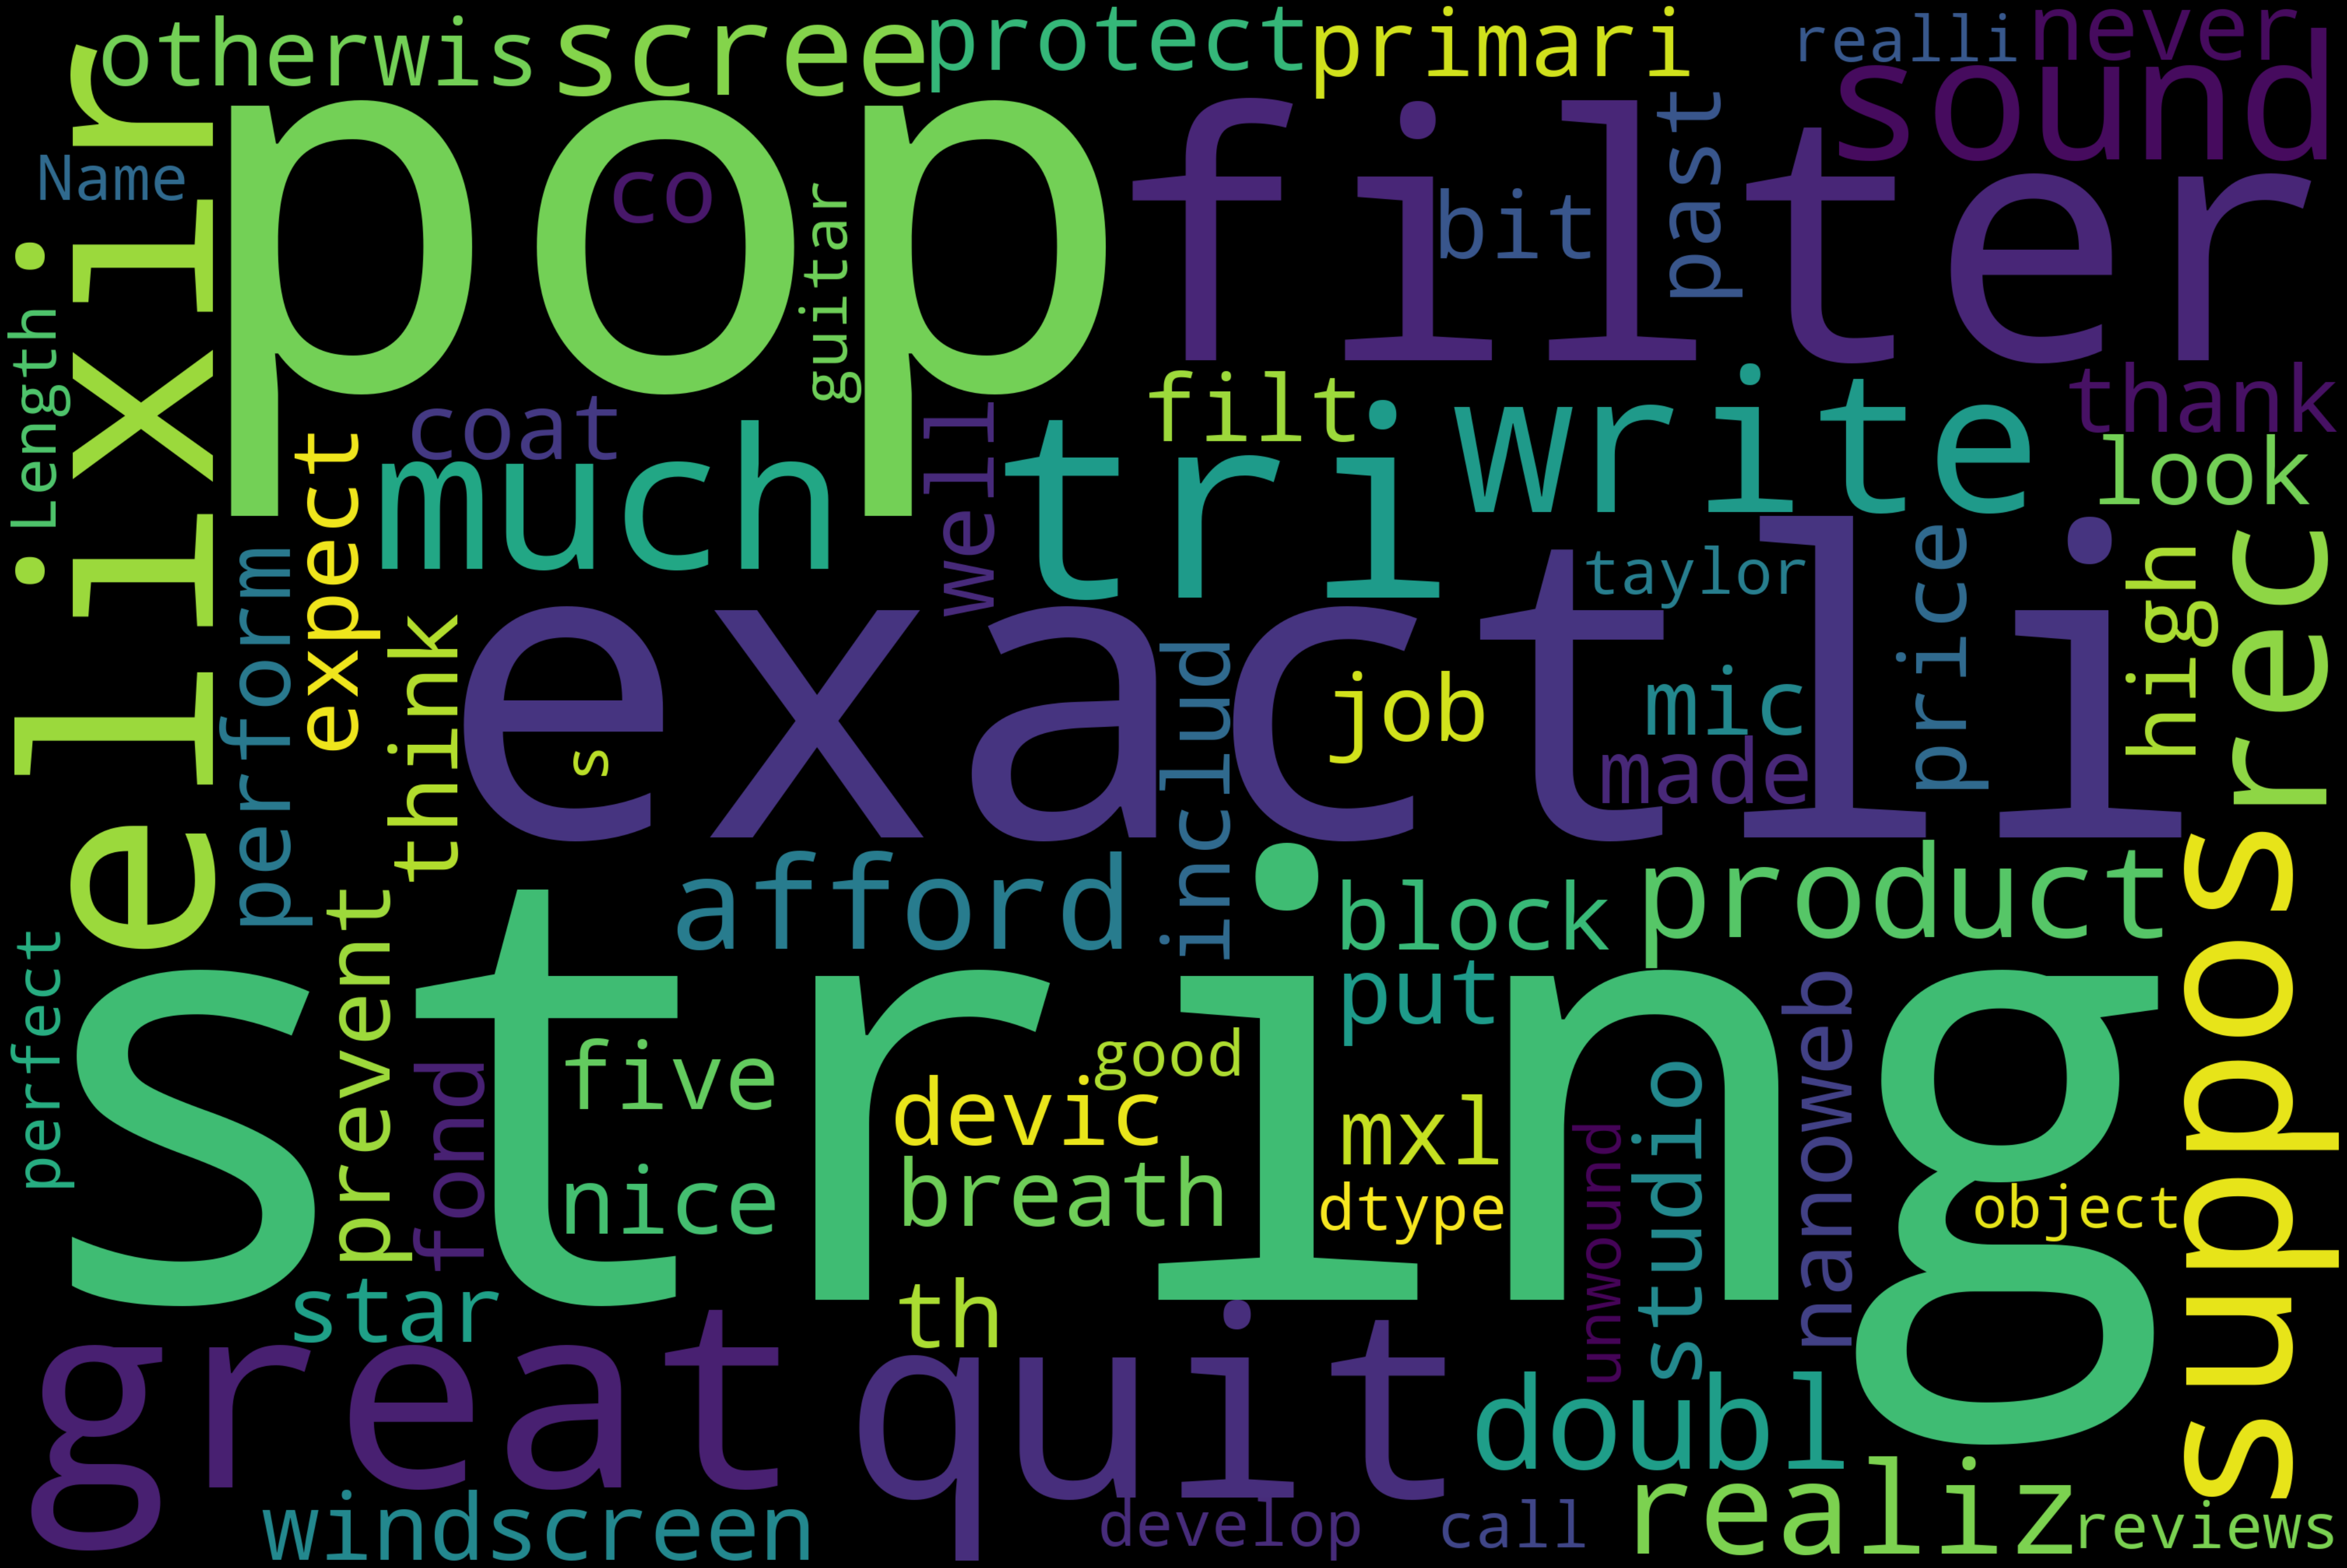

In [30]:
text = review_pos["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see positive words like great,affordable,expected,exactly etc.,

#### Wordcloud-Neutral reviews

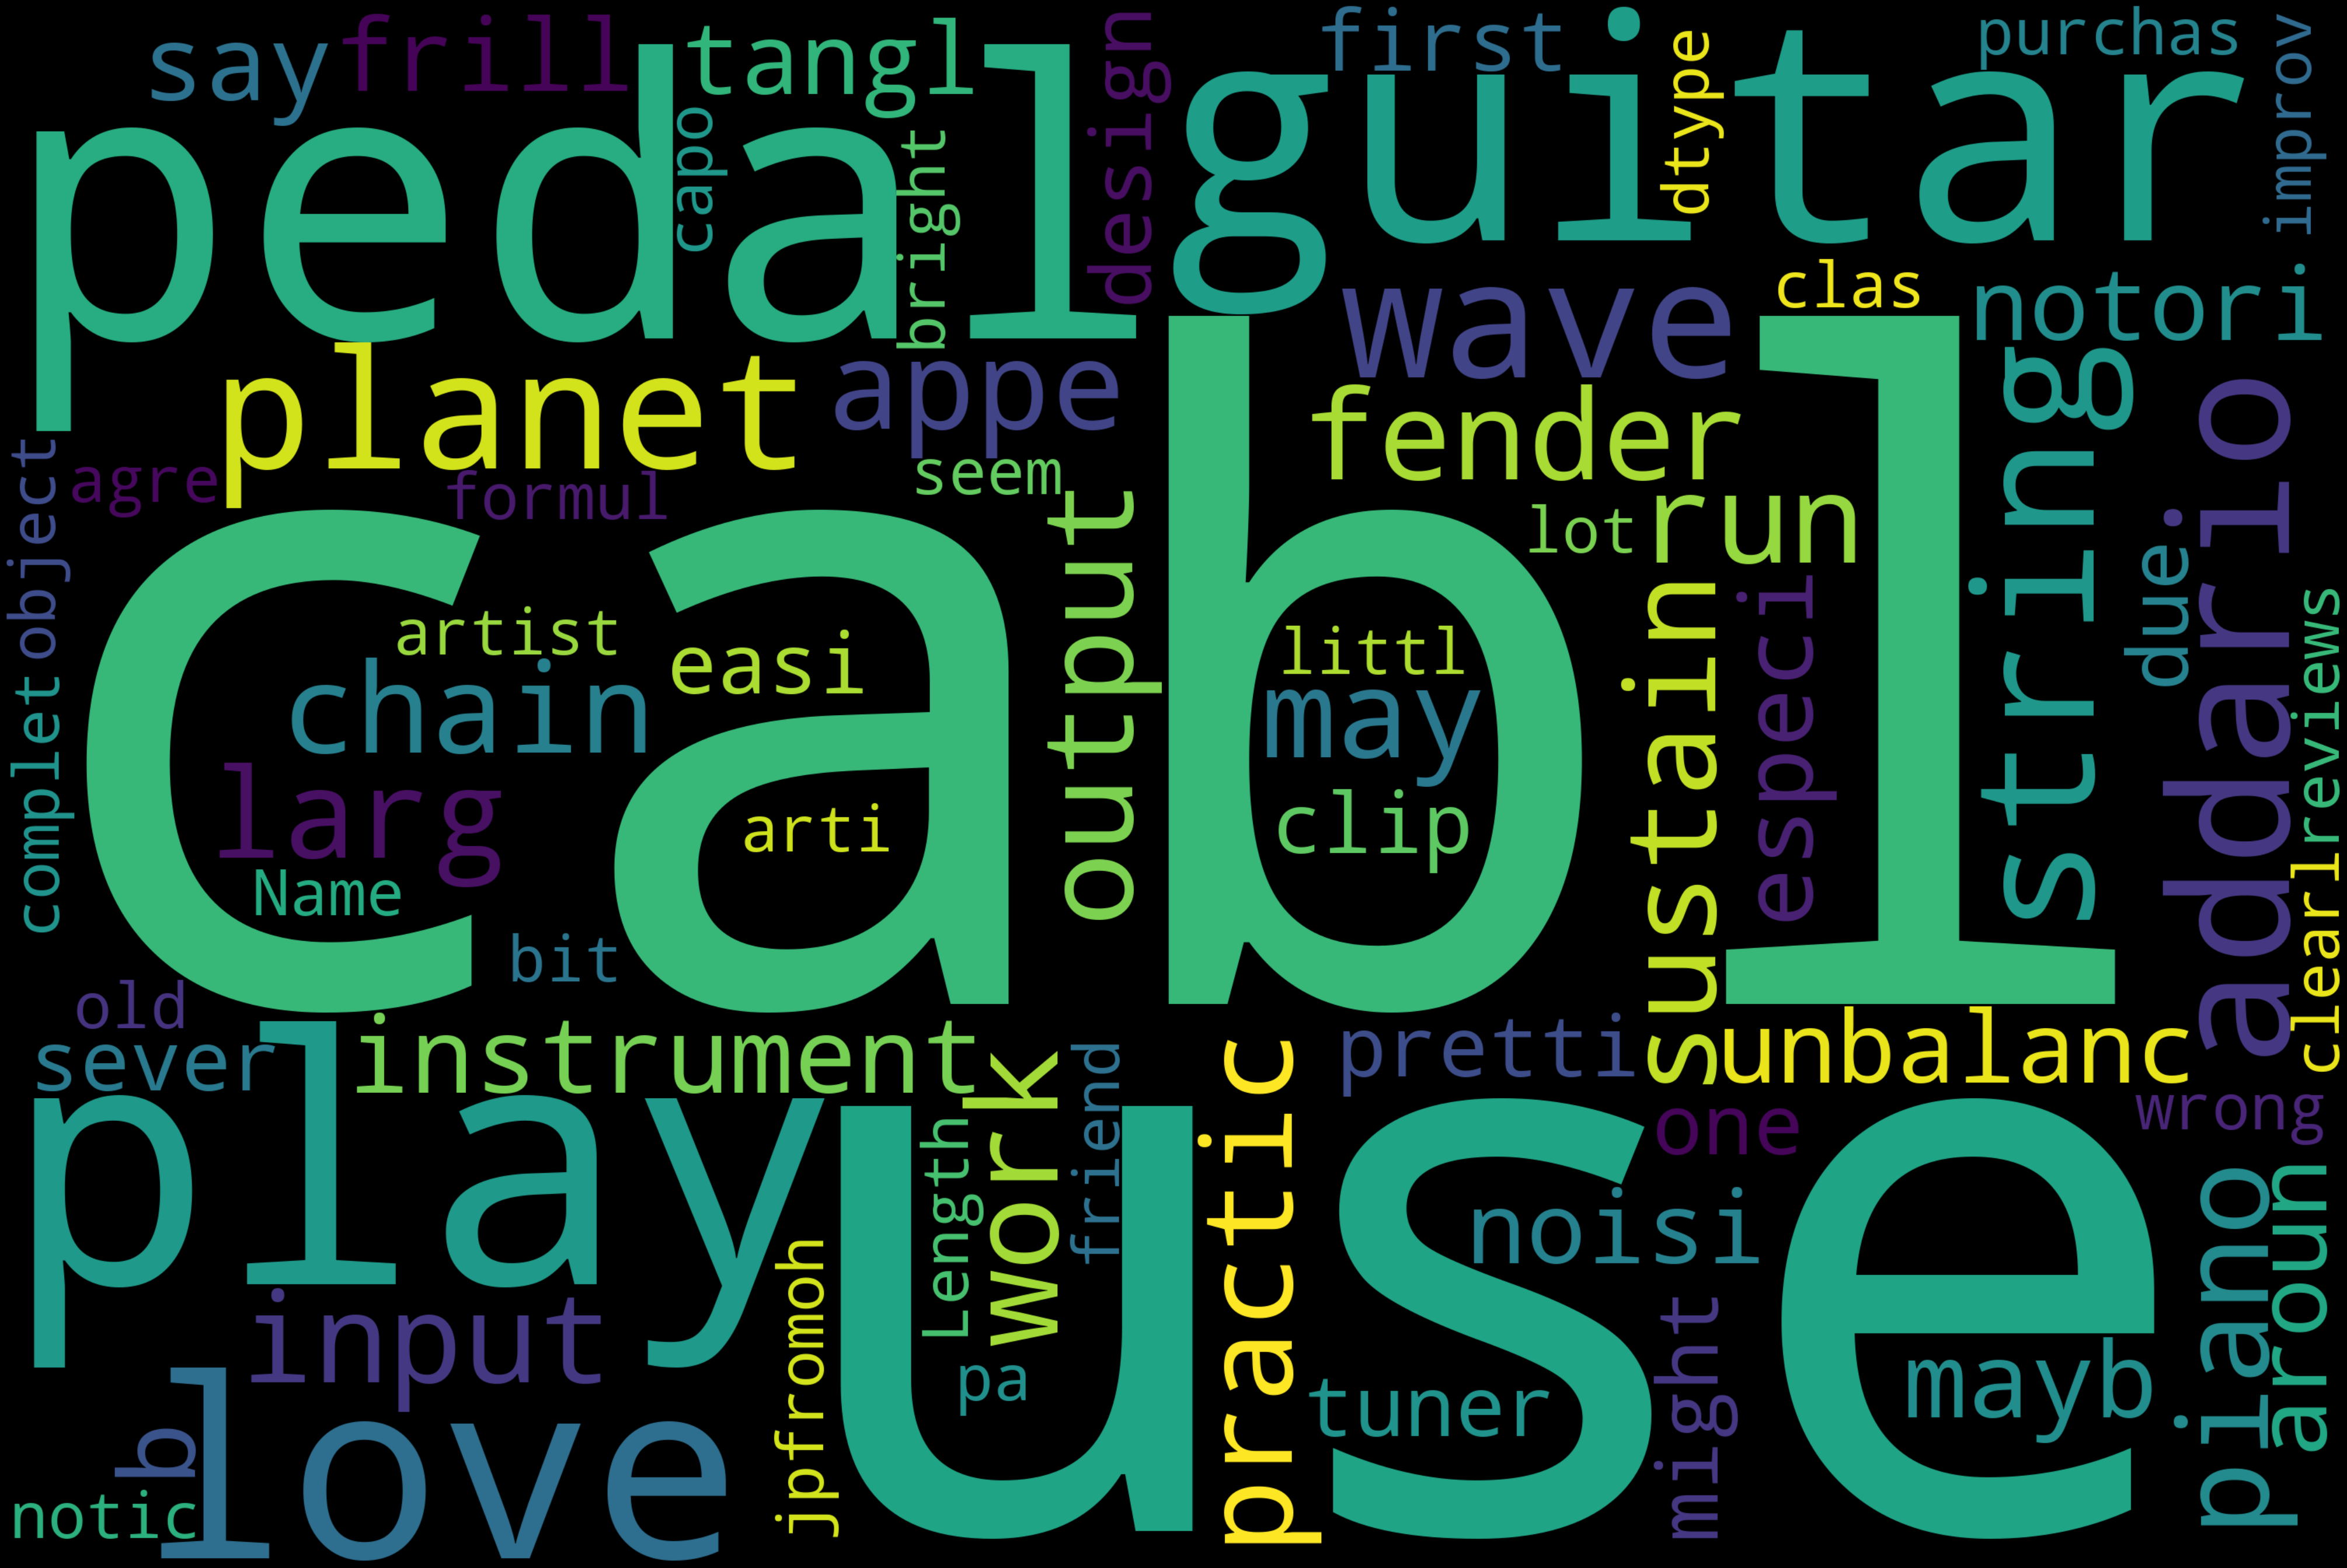

In [31]:
text = review_neu["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Most of the neutral review words are focussed on the products and how can they be improved.

#### Wordcloud-Negative reviews

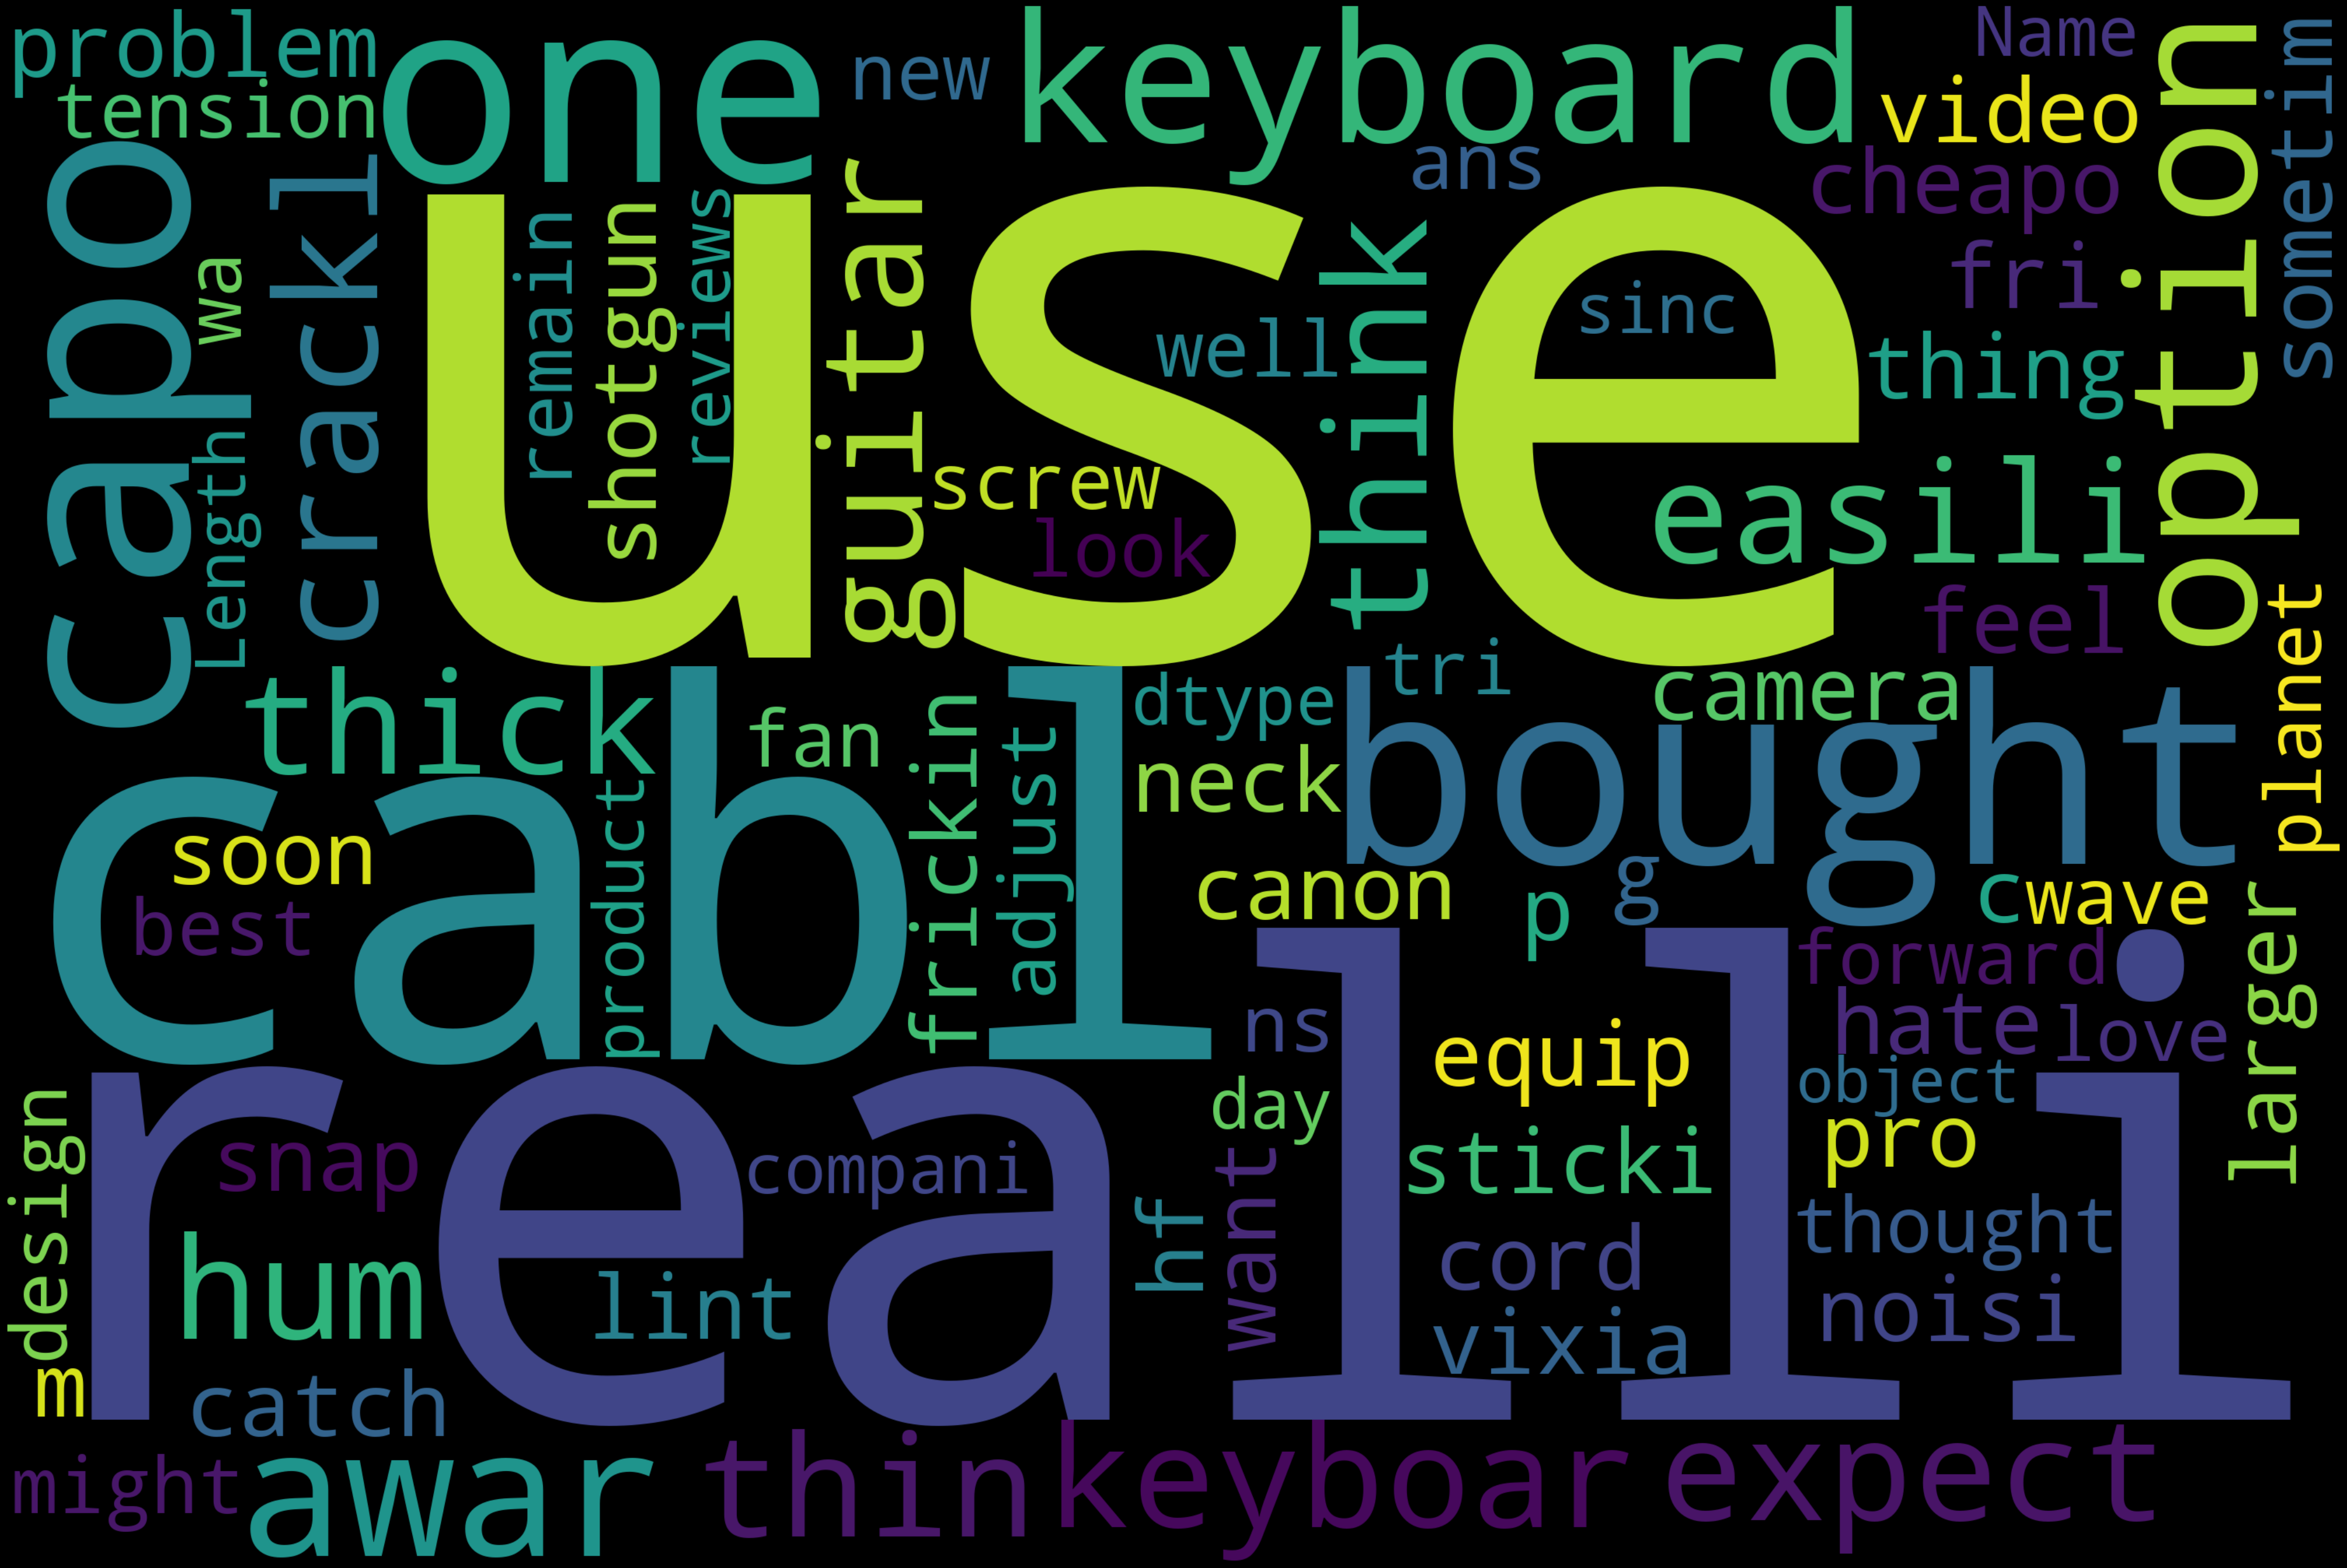

In [32]:
text = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see negative review words such as noisy,didnt,frickin,wasnt,snap,problems,tension etc.,

### Extracting Features from Cleaned reviews
Before we build the model for our sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. 
In this project, we are going to use TF-IDF method to convert the texts

In [33]:
#Encoding target variable-sentiment

df['sentiment'] = df['sentiment'].map({'Positive' : 0 , 'Negative' : 1 , 'Neutral' : 2} )


In [34]:
df['sentiment'].value_counts()

sentiment
0    9022
2     772
1     467
Name: count, dtype: int64

In [35]:
df['reviews']

0        much write exactli suppos filter pop sound rec...
1        product exactli quit afford realiz doubl scree...
2        primari job devic block breath would otherwis ...
3        nice windscreen protect mxl mic prevent pop th...
4        pop filter great look perform like studio filt...
                               ...                        
10256                         great expect thank five star
10257    think tri nanoweb string bit put high price co...
10258    tri coat string past includ elixir never fond ...
10259    well made elixir develop taylor guitar string ...
10260    string realli quit good call perfect unwound s...
Name: reviews, Length: 10261, dtype: object

This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1's and 0's.
To encode it we use TFIDF



### TFIDF(Term Frequency — Inverse Document Frequency)

TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus.
This method is a widely used technique in Information Retrieval and Text Mining.

Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the reviews.

In [36]:
vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))

# TF-IDF feature matrix

X= vectorizer.fit_transform(df['reviews'])

In [37]:
X.shape

(10261, 5000)

In [38]:
#target variable 
y = df['sentiment']


In [39]:
from collections import Counter
print(f'Original dataset shape : {Counter(y)}')  #he Counter function is commonly used to count the occurrences of elements in an iterable such as a list

Original dataset shape : Counter({0: 9022, 2: 772, 1: 467})


### Handling Imbalance target feature-SMOTE

In our target feature, we noticed that we got a lot of positive sentiments compared to negative and neutral.
So it is crucial to balanced the classes in such situation. Here I use SMOTE(Synthetic Minority Oversampling Technique) to balance out the imbalanced dataset problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. 
These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. 
After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [40]:
from imblearn.over_sampling import SMOTE

print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({0: 9022, 2: 772, 1: 467})
Resampled dataset shape Counter({0: 9022, 2: 9022, 1: 9022})


#### Train-test split

Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.

In [41]:
## Divide the dataset into Train and Test


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

## Model Training: Sentiment Analysis
    
As we have successfully processed the text data, now it is just a normal machine learning problem. 
Where from the sparse matrix we predict the classes in target feature.

#### Logisitic Regression

In [42]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred = model.predict(X_test)

acc =metrics.accuracy_score(y_test,y_pred)
print('Test Accuracy :', acc)


Test Accuracy : 0.8921235407122802


We have got 89% accuracy. That ain't bad.
But for classification problems we need to get confusion matrix and check f1 score rather than accuracy

#### Classification metrics

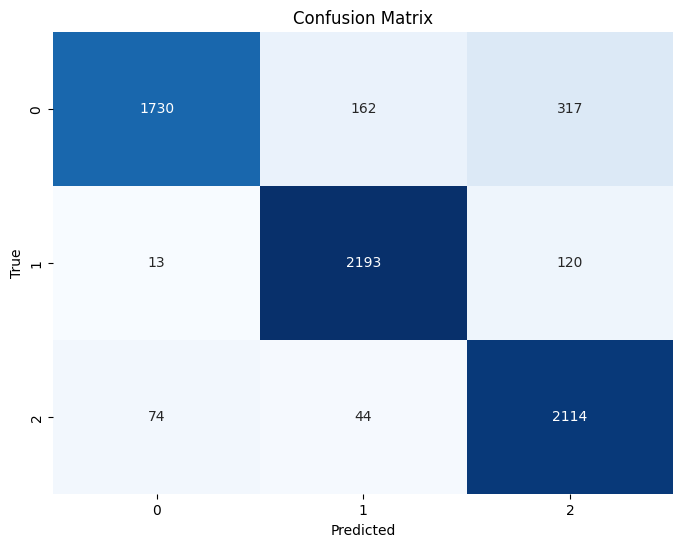

In [44]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Check out the diagonal elements(1730+2193+2114), they are correctly predicted records and rest are incorrectly classified by the algorithm

In [45]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86      2209
           1       0.91      0.94      0.93      2326
           2       0.83      0.95      0.88      2232

    accuracy                           0.89      6767
   macro avg       0.90      0.89      0.89      6767
weighted avg       0.90      0.89      0.89      6767



#### SVM

Test Accuracy : 0.9766513964829319


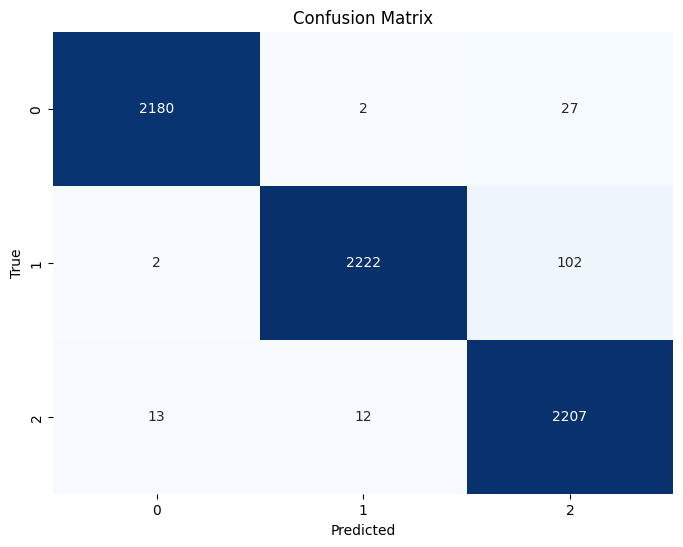

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2209
           1       0.99      0.96      0.97      2326
           2       0.94      0.99      0.97      2232

    accuracy                           0.98      6767
   macro avg       0.98      0.98      0.98      6767
weighted avg       0.98      0.98      0.98      6767



In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

acc =metrics.accuracy_score(y_test,y_pred)
print('Test Accuracy :', acc)

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n",classification_report(y_test, y_pred))

### Decision Tree


Test Accuracy : 0.9766513964829319


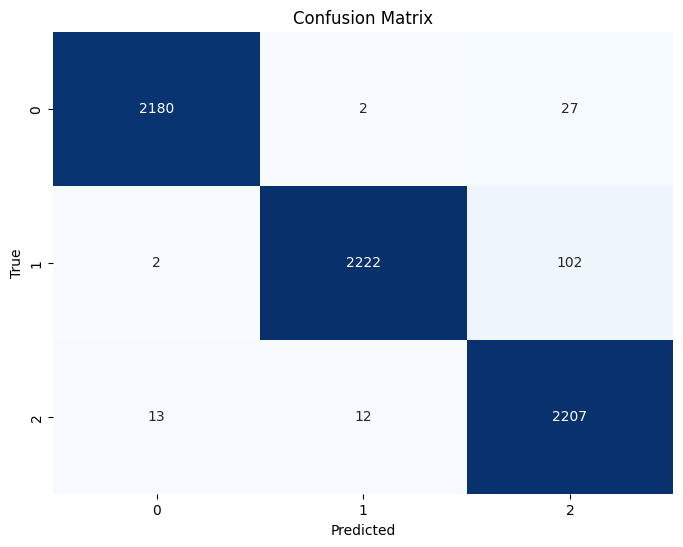

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2209
           1       0.99      0.96      0.97      2326
           2       0.94      0.99      0.97      2232

    accuracy                           0.98      6767
   macro avg       0.98      0.98      0.98      6767
weighted avg       0.98      0.98      0.98      6767



In [47]:
from sklearn.tree import DecisionTreeClassifier

model = SVC()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

acc =metrics.accuracy_score(y_test,y_pred)
print('Test Accuracy :', acc)

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n",classification_report(y_test, y_pred))

### RandomForest

Test Accuracy : 0.9766513964829319


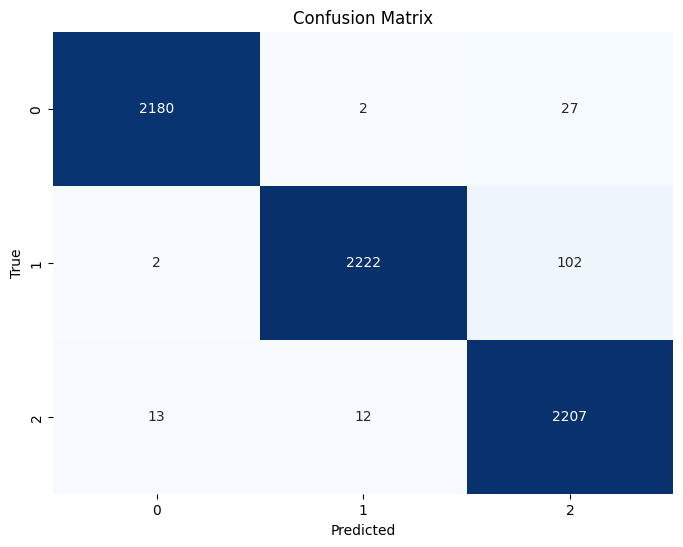

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2209
           1       0.99      0.96      0.97      2326
           2       0.94      0.99      0.97      2232

    accuracy                           0.98      6767
   macro avg       0.98      0.98      0.98      6767
weighted avg       0.98      0.98      0.98      6767



In [48]:
from sklearn.ensemble import RandomForestClassifier

model = SVC()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

acc =metrics.accuracy_score(y_test,y_pred)
print('Test Accuracy :', acc)

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n",classification_report(y_test, y_pred))

# Conclusion

We have done a pretty neat job on classifying all the classes starting from splitting the sentiments based on overall score,text cleaning, customize the stopwords list based on requirement and finally handling imbalance with smote.
Here are few insights from the notebook.

Consider welcoming ngram in sentiment analysis as one word can't give is proper results and stop words got to be manually checked as they have negative words.
It is advised to avoid using stop words in sentiment analysis

Most of our neutral reviews were actual critic of product from the buyers, so amazon can consider these as feedback and give them to the seller to help them improve their products

Most of the reviews in this dataset were about string instruments such as guitar.

Balancing the dataset got me a very fruitful accuracy score. Without balancing, I got good precision but very bad recall and inturn affected my f1 score. So balancing the target feature is important

In sentiment analysis, we should concentrate on our f1 score where we got an average of 98% so we did a pretty good job.